In [58]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import math
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from itertools import cycle
from math import ceil
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
print("setup complete")

setup complete


In [38]:
sales = pd.read_csv('70prod_data.csv',\
                    index_col=0, parse_dates=True)

In [6]:
sales

,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9,P_10,...,P_61,P_62,P_63,P_64,P_65,P_66,P_67,P_68,P_69,P_70
2014-07-31,2669,3603,3506,1274,1528,2244,1460,2523,2045,1713,...,1721,2506,3011,1039,1374,1840,1359,1407,1108,1544
2014-08-31,2794,3405,3279,1449,1526,1970,1423,2660,2065,1774,...,1906,2701,3081,1134,1331,1877,1424,1503,1061,1490
2014-09-30,2289,3434,3238,1426,1484,1877,1369,2581,1775,1875,...,1979,2618,3004,1160,1327,1827,1357,1449,1049,1465
2014-10-31,2310,3277,3088,1404,1500,1615,1159,2326,1614,1893,...,1982,2693,3215,1180,1369,1883,1384,1446,1050,1584
2014-11-30,2559,3396,2921,1329,1384,1796,1395,2351,1749,1678,...,2025,2607,3280,1065,1286,1766,1345,1377,988,1518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-31,4069,5337,5561,2936,2589,2900,3625,4075,3688,3497,...,2439,3478,3241,1634,1905,2248,1939,1968,1573,1718
2019-06-30,3546,5267,5565,2713,3286,2899,3630,3593,4068,3424,...,2350,3548,3188,1597,2208,2307,1899,1984,1671,1797
2019-07-31,3576,4810,5065,2448,2404,3081,3359,3352,3630,3272,...,2392,3253,3492,1560,2290,2514,2121,1970,1968,1966
2019-08-31,3912,4989,4942,2843,2525,3198,3415,3792,4417,3133,...,2599,3200,3807,1817,2556,2532,2179,2110,1873,2010


In [110]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
P_1,63.0,3510.761905,656.364885,2289.0,2997.0,3546.0,3992.0,4885.0
P_2,63.0,4341.333333,671.591874,3152.0,3848.0,4464.0,4810.0,5873.0
P_3,63.0,4448.523810,693.352814,2909.0,4105.5,4607.0,4943.0,5644.0
P_4,63.0,2267.888889,435.481014,1274.0,2065.0,2371.0,2541.5,2974.0
P_5,63.0,2390.111111,489.206009,1252.0,2198.5,2492.0,2705.5,3327.0
...,...,...,...,...,...,...,...,...
P_66,63.0,2075.317460,231.814082,1742.0,1877.5,2035.0,2231.0,2591.0
P_67,63.0,1685.857143,275.337556,1294.0,1424.0,1645.0,1928.5,2199.0
P_68,63.0,1649.063492,303.335058,748.0,1427.5,1562.0,1915.5,2243.0
P_69,63.0,1420.682540,313.456218,766.0,1164.0,1538.0,1658.5,1968.0


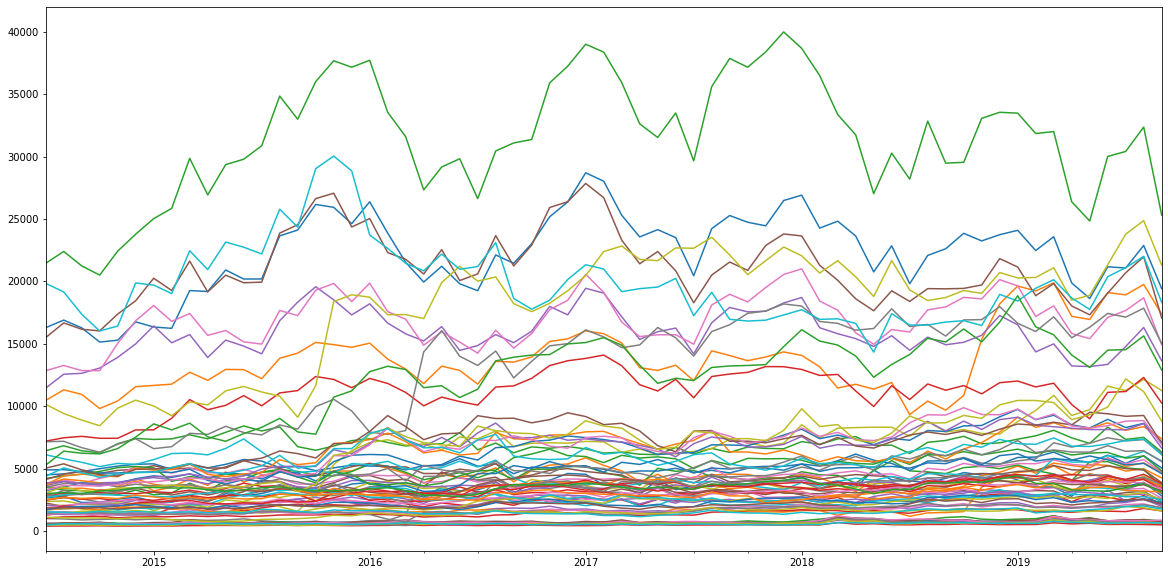

In [114]:
sales.plot(figsize=(20, 10),legend=False)
plt.show()


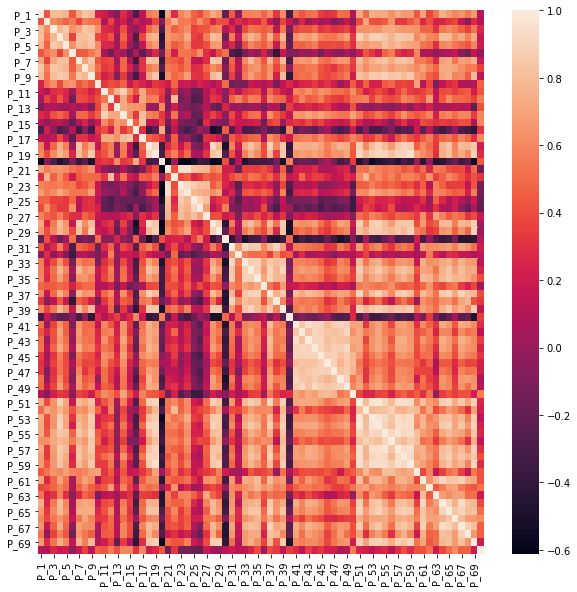

In [121]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(sales.corr())

In [39]:
sales_trans=sales.copy()
for col in sales.columns:
    scaler = MinMaxScaler()
    sales_trans[[col]] = scaler.fit_transform(sales_trans[[col]])

In [43]:
for col in sales.columns:
    print(sales_trans[[col]])

                 P_1
2014-07-31  0.146379
2014-08-31  0.194530
2014-09-30  0.000000
2014-10-31  0.008089
2014-11-30  0.104006
...              ...
2019-05-31  0.685670
2019-06-30  0.484206
2019-07-31  0.495763
2019-08-31  0.625193
2019-09-30  0.204931

[63 rows x 1 columns]
                 P_2
2014-07-31  0.165748
2014-08-31  0.092981
2014-09-30  0.103638
2014-10-31  0.045939
2014-11-30  0.089673
...              ...
2019-05-31  0.803014
2019-06-30  0.777288
2019-07-31  0.609335
2019-08-31  0.675119
2019-09-30  0.406468

[63 rows x 1 columns]
                 P_3
2014-07-31  0.218282
2014-08-31  0.135283
2014-09-30  0.120293
2014-10-31  0.065448
2014-11-30  0.004388
...              ...
2019-05-31  0.969653
2019-06-30  0.971115
2019-07-31  0.788300
2019-08-31  0.743327
2019-09-30  0.232176

[63 rows x 1 columns]
                 P_4
2014-07-31  0.000000
2014-08-31  0.102941
2014-09-30  0.089412
2014-10-31  0.076471
2014-11-30  0.032353
...              ...
2019-05-31  0.977647
2019-06

[63 rows x 1 columns]
                P_57
2014-07-31  0.000000
2014-08-31  0.059268
2014-09-30  0.054884
2014-10-31  0.052313
2014-11-30  0.070759
...              ...
2019-05-31  0.753553
2019-06-30  0.782280
2019-07-31  0.837466
2019-08-31  0.843514
2019-09-30  0.552464

[63 rows x 1 columns]
                P_58
2014-07-31  0.000000
2014-08-31  0.111037
2014-09-30  0.040640
2014-10-31  0.050855
2014-11-30  0.097491
...              ...
2019-05-31  0.795470
2019-06-30  0.908728
2019-07-31  0.808572
2019-08-31  0.820342
2019-09-30  0.624917

[63 rows x 1 columns]
                P_59
2014-07-31  0.000000
2014-08-31  0.052217
2014-09-30  0.017515
2014-10-31  0.014231
2014-11-30  0.042036
...              ...
2019-05-31  0.686371
2019-06-30  0.752162
2019-07-31  1.000000
2019-08-31  0.888998
2019-09-30  0.629557

[63 rows x 1 columns]
                P_60
2014-07-31  0.020021
2014-08-31  0.195329
2014-09-30  0.098049
2014-10-31  0.000000
2014-11-30  0.071612
...              ...
2019-0

In [45]:
for col in sales.columns:
    print(sales_trans.iloc[col])

TypeError: Cannot index by location index with a non-integer key

In [42]:
sales_trans

,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9,P_10,...,P_61,P_62,P_63,P_64,P_65,P_66,P_67,P_68,P_69,P_70
2014-07-31,0.146379,0.165748,0.218282,0.000000,0.133012,0.201732,0.116939,0.191697,0.153764,0.019241,...,0.000000,0.171647,0.144155,0.000000,0.072214,0.115430,0.071823,0.440803,0.284526,0.456876
2014-08-31,0.194530,0.092981,0.135283,0.102941,0.132048,0.113855,0.102564,0.261917,0.160899,0.052776,...,0.159483,0.295613,0.186554,0.122108,0.038462,0.159011,0.143646,0.505017,0.245424,0.393939
2014-09-30,0.000000,0.103638,0.120293,0.089412,0.111807,0.084028,0.081585,0.221425,0.057438,0.108301,...,0.222414,0.242848,0.139915,0.155527,0.035322,0.100118,0.069613,0.468896,0.235441,0.364802
2014-10-31,0.008089,0.045939,0.065448,0.076471,0.119518,0.000000,0.000000,0.090723,0.000000,0.118197,...,0.225000,0.290528,0.267717,0.181234,0.068289,0.166078,0.099448,0.466890,0.236273,0.503497
2014-11-30,0.104006,0.089673,0.004388,0.032353,0.063614,0.058050,0.091686,0.103537,0.048163,0.000000,...,0.262069,0.235855,0.307087,0.033419,0.003140,0.028269,0.056354,0.420736,0.184692,0.426573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-31,0.685670,0.803014,0.969653,0.977647,0.644337,0.412123,0.958042,0.987186,0.739922,1.000000,...,0.618966,0.789574,0.283465,0.764781,0.489011,0.595995,0.712707,0.816054,0.671381,0.659674
2019-06-30,0.484206,0.777288,0.971115,0.846471,0.980241,0.411802,0.959984,0.740133,0.875491,0.959868,...,0.542241,0.834075,0.251363,0.717224,0.726845,0.665489,0.668508,0.826756,0.752912,0.751748
2019-07-31,0.495763,0.609335,0.788300,0.690588,0.555181,0.470173,0.854701,0.616607,0.719229,0.876306,...,0.578448,0.646535,0.435494,0.669666,0.791209,0.909305,0.913812,0.817391,1.000000,0.948718
2019-08-31,0.625193,0.675119,0.743327,0.922941,0.613494,0.507697,0.876457,0.842132,1.000000,0.799890,...,0.756897,0.612842,0.626287,1.000000,1.000000,0.930506,0.977901,0.911037,0.920965,1.000000


In [61]:
df=sales_trans.T

In [62]:
pca = PCA(n_components=2)
pca_res = pca.fit_transform(df.T)

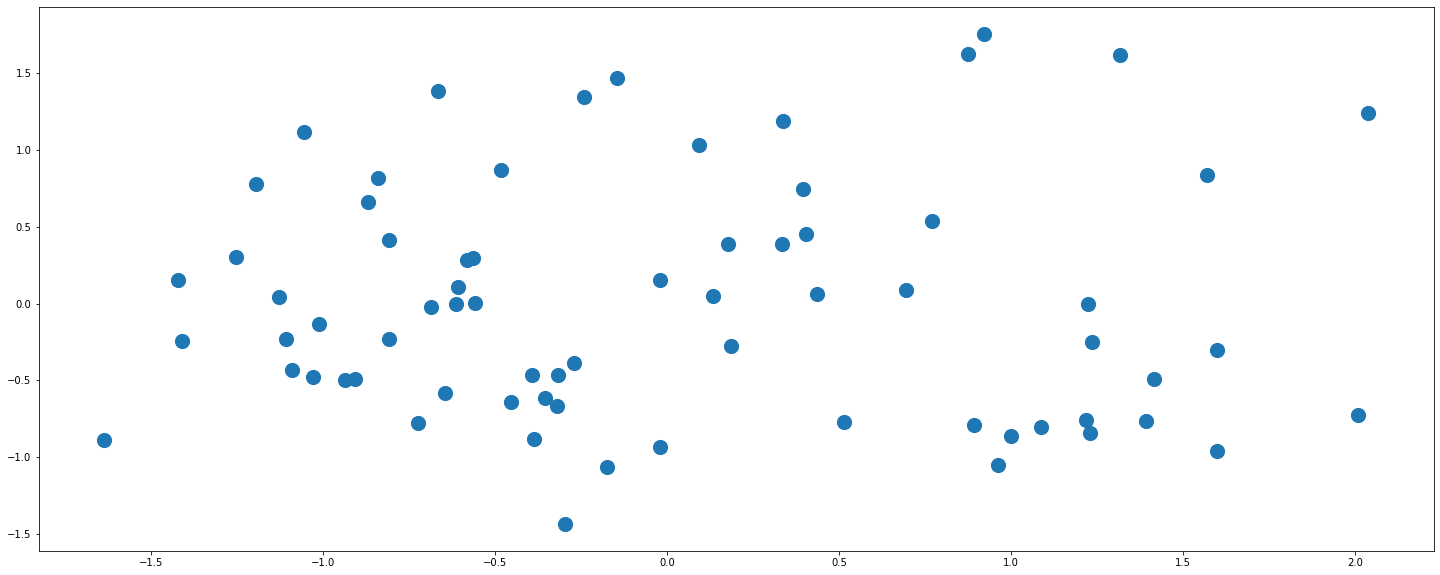

In [49]:
plt.figure(figsize=(25,10))
plt.scatter(pca_res[:,0],pca_res[:,1], s=200)
plt.show()

In [54]:
print(pca_res[:10,:])


[[-0.61355657 -0.00271688]
 [ 0.09205821  1.03059421]
 [-0.87143019  0.66107055]
 [-1.13037105  0.04106856]
 [-0.8099231   0.41134469]
 [-0.24329255  1.34396832]
 [-1.01364043 -0.13216305]
 [-0.56575707  0.29560193]
 [-1.42338057  0.15097156]
 [ 0.33610564  1.18921395]]


In [57]:
cluster_count = math.ceil(math.sqrt(len(sales))) 
cluster_count

8

In [59]:
kmeans = KMeans(n_clusters=cluster_count,max_iter=5000)

labels = kmeans.fit_predict(pca_res)

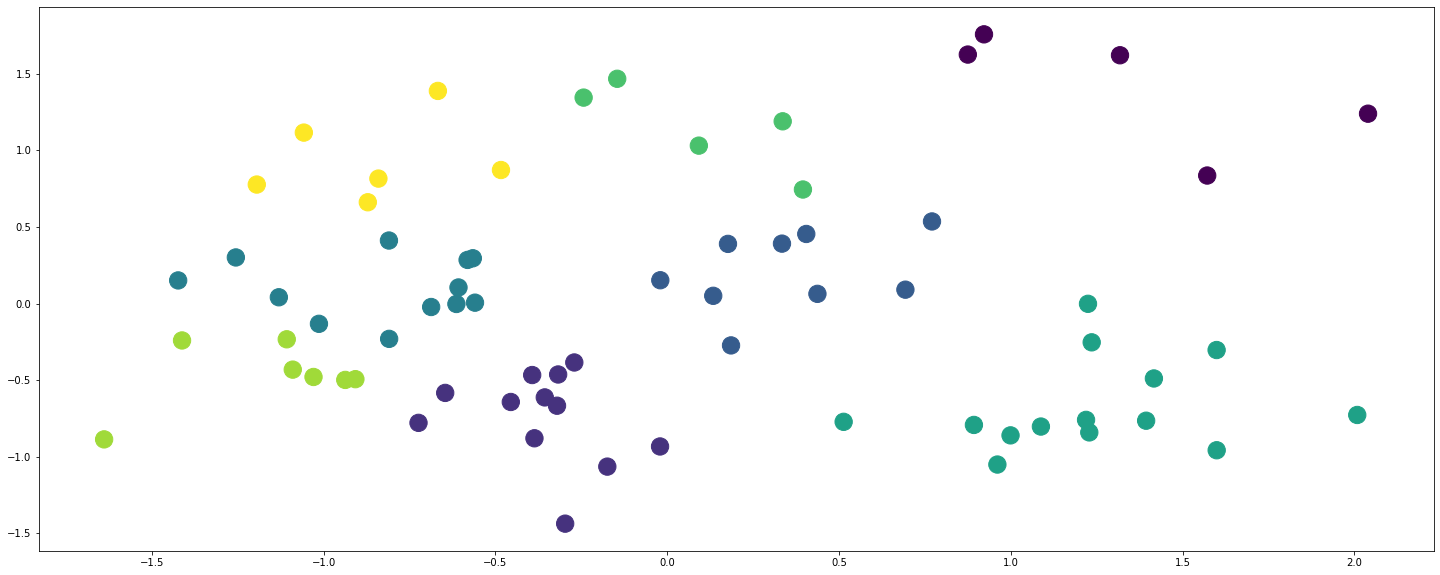

In [60]:
plt.figure(figsize=(25,10))
plt.scatter(pca_res[:, 0], pca_res[:, 1], c=labels, s=300)
plt.show()

In [68]:
for i in range(len(labels)):
   print(df.iloc[i,:])


2014-07-31    0.146379
2014-08-31    0.194530
2014-09-30    0.000000
2014-10-31    0.008089
2014-11-30    0.104006
                ...   
2019-05-31    0.685670
2019-06-30    0.484206
2019-07-31    0.495763
2019-08-31    0.625193
2019-09-30    0.204931
Name: P_1, Length: 63, dtype: float64
2014-07-31    0.165748
2014-08-31    0.092981
2014-09-30    0.103638
2014-10-31    0.045939
2014-11-30    0.089673
                ...   
2019-05-31    0.803014
2019-06-30    0.777288
2019-07-31    0.609335
2019-08-31    0.675119
2019-09-30    0.406468
Name: P_2, Length: 63, dtype: float64
2014-07-31    0.218282
2014-08-31    0.135283
2014-09-30    0.120293
2014-10-31    0.065448
2014-11-30    0.004388
                ...   
2019-05-31    0.969653
2019-06-30    0.971115
2019-07-31    0.788300
2019-08-31    0.743327
2019-09-30    0.232176
Name: P_3, Length: 63, dtype: float64
2014-07-31    0.000000
2014-08-31    0.102941
2014-09-30    0.089412
2014-10-31    0.076471
2014-11-30    0.032353
            

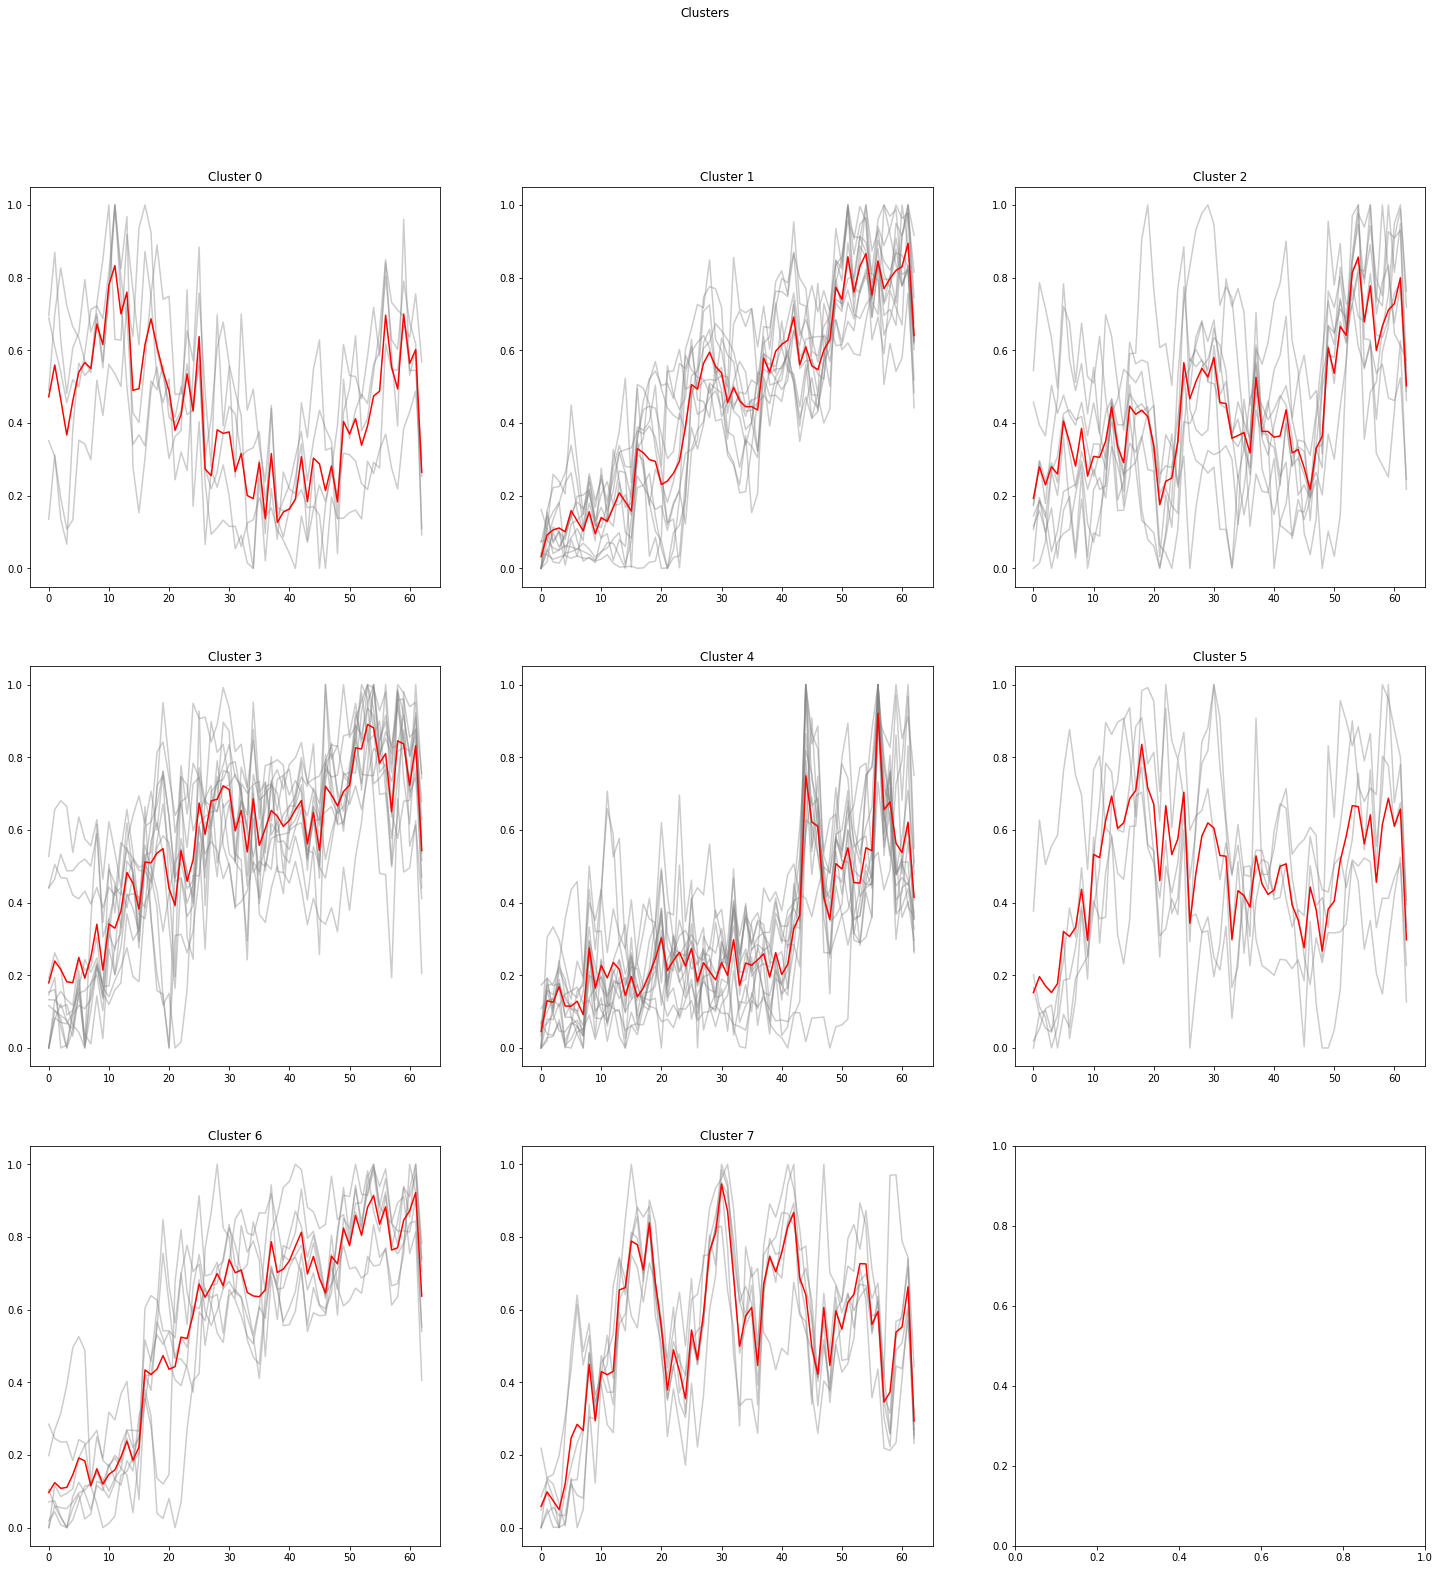

In [74]:
som_x = som_y = math.ceil(math.sqrt(math.sqrt(len(sales))))
plot_count = math.ceil(math.sqrt(cluster_count))

fig, axs = plt.subplots(plot_count,plot_count,figsize=(25,25))
fig.suptitle('Clusters')
row_i=0
column_j=0
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(np.array(df.iloc[i,:]),c="gray",alpha=0.4)
                cluster.append(df.iloc[i,:])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(np.average(np.vstack(cluster),axis=0),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*som_y+column_j))
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0
        
plt.show()

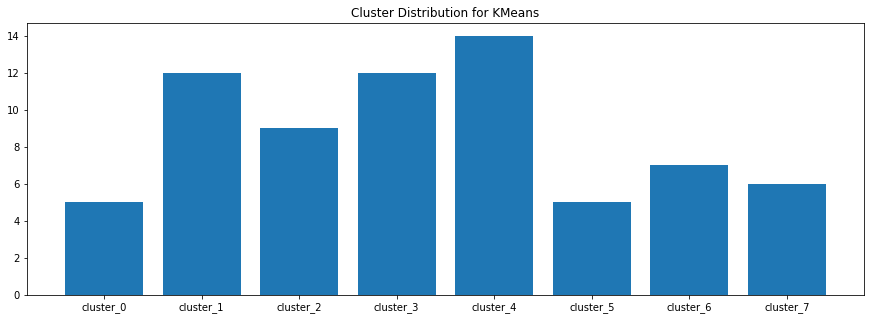

In [75]:
cluster_c = [len(labels[labels==i]) for i in range(cluster_count)]
cluster_n = ["cluster_"+str(i) for i in range(cluster_count)]
plt.figure(figsize=(15,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n,cluster_c)
plt.show()

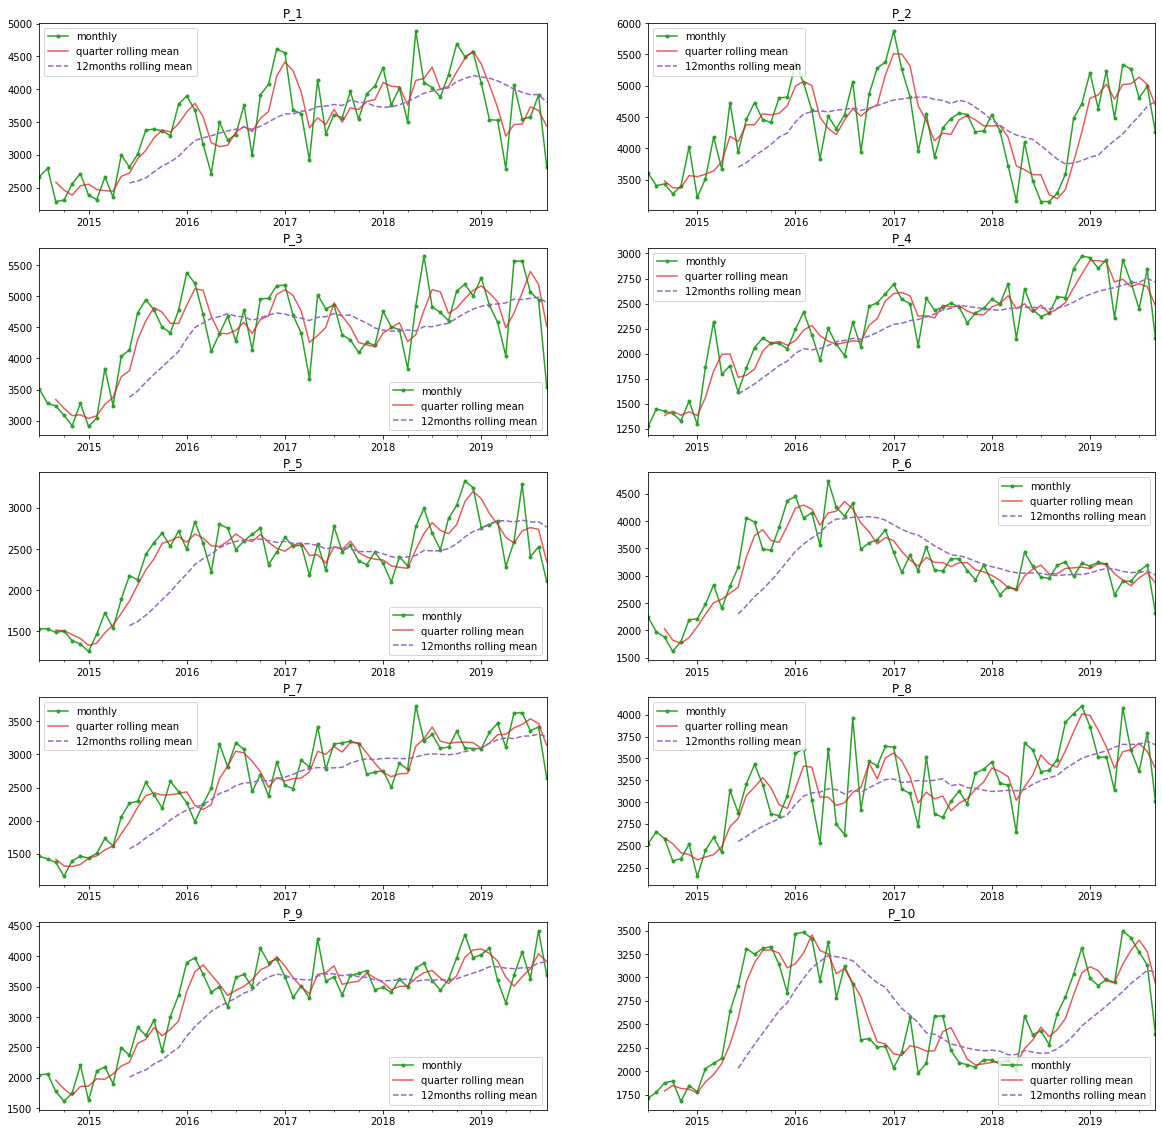

In [119]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
axs = axs.flatten()
cols = [next(color_cycle), next(color_cycle), next(color_cycle)]
for i, item in enumerate(sales.columns):
    sales[item].plot(title=item,
                     color=cols[0],
                     ax=axs[i],
                     marker='.', label="monthly")
    sales[item].rolling(3).mean().plot(
                     color=cols[1],
                     ax=axs[i], label="quarter rolling mean", alpha=0.75)
    sales[item].rolling(12).mean().plot(
                     color=cols[2],
                     ax=axs[i], linestyle='--', label="12months rolling mean")
    axs[i].legend()
    if i==9 : break

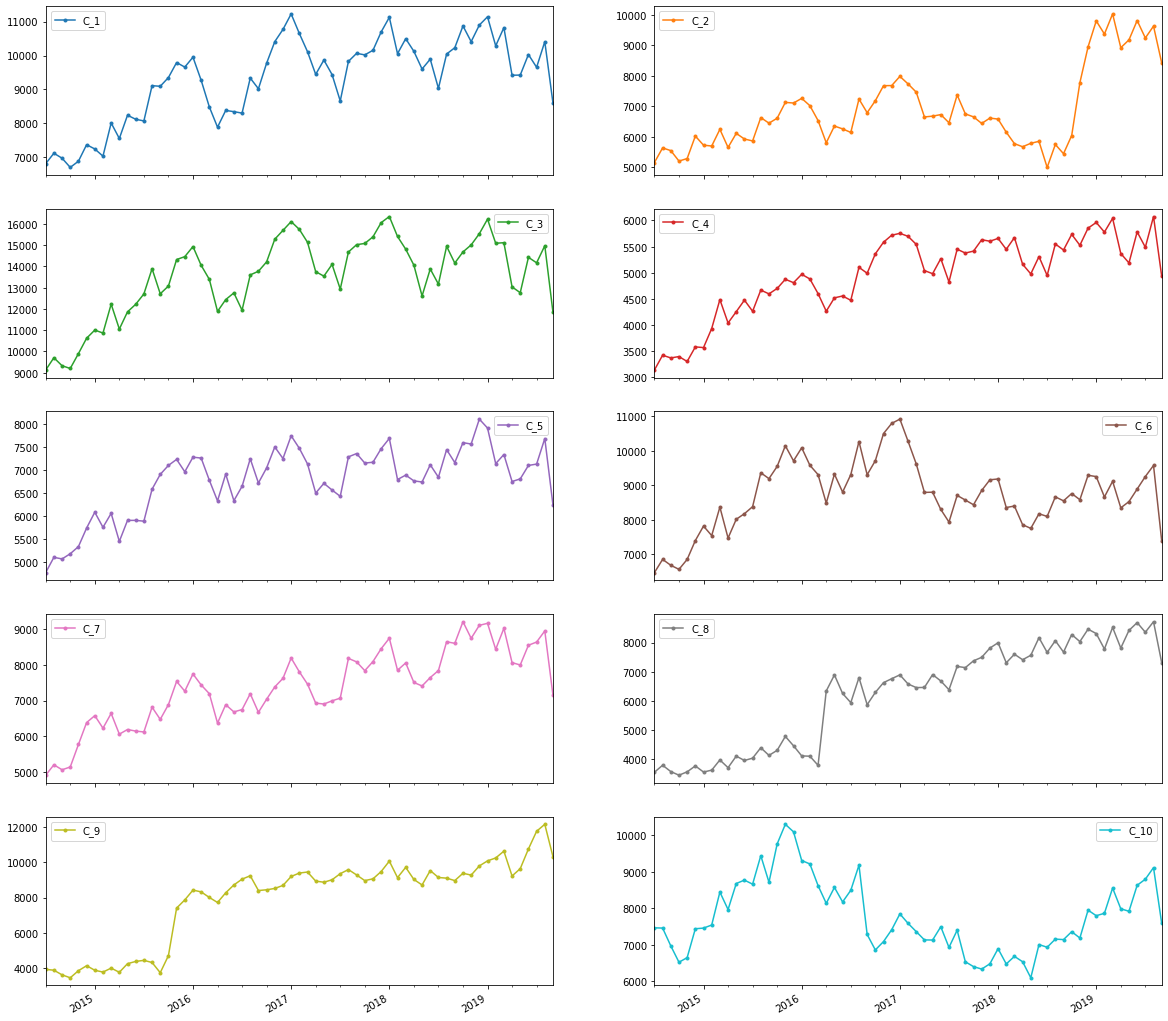

In [9]:
sales.plot(subplots=True,layout=(5,2),figsize=(20,20), marker='.')
plt.show()

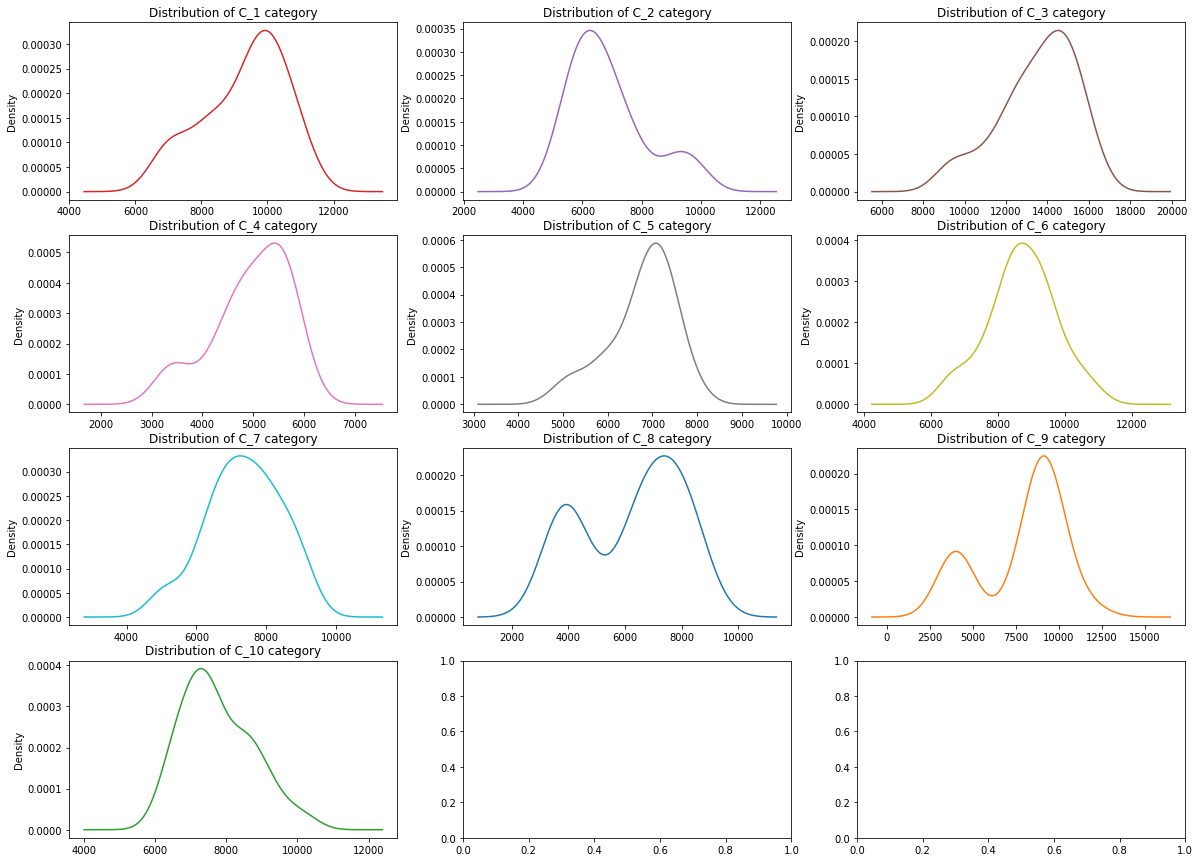

In [10]:
fig, axs = plt.subplots(4, 3, figsize=(20, 15))
axs = axs.flatten()
for i, item in enumerate(sales.columns):
    sales[item].plot(kind='density',
                         title=f'Distribution of {item} category',
                     color=next(color_cycle),
                     ax=axs[i])

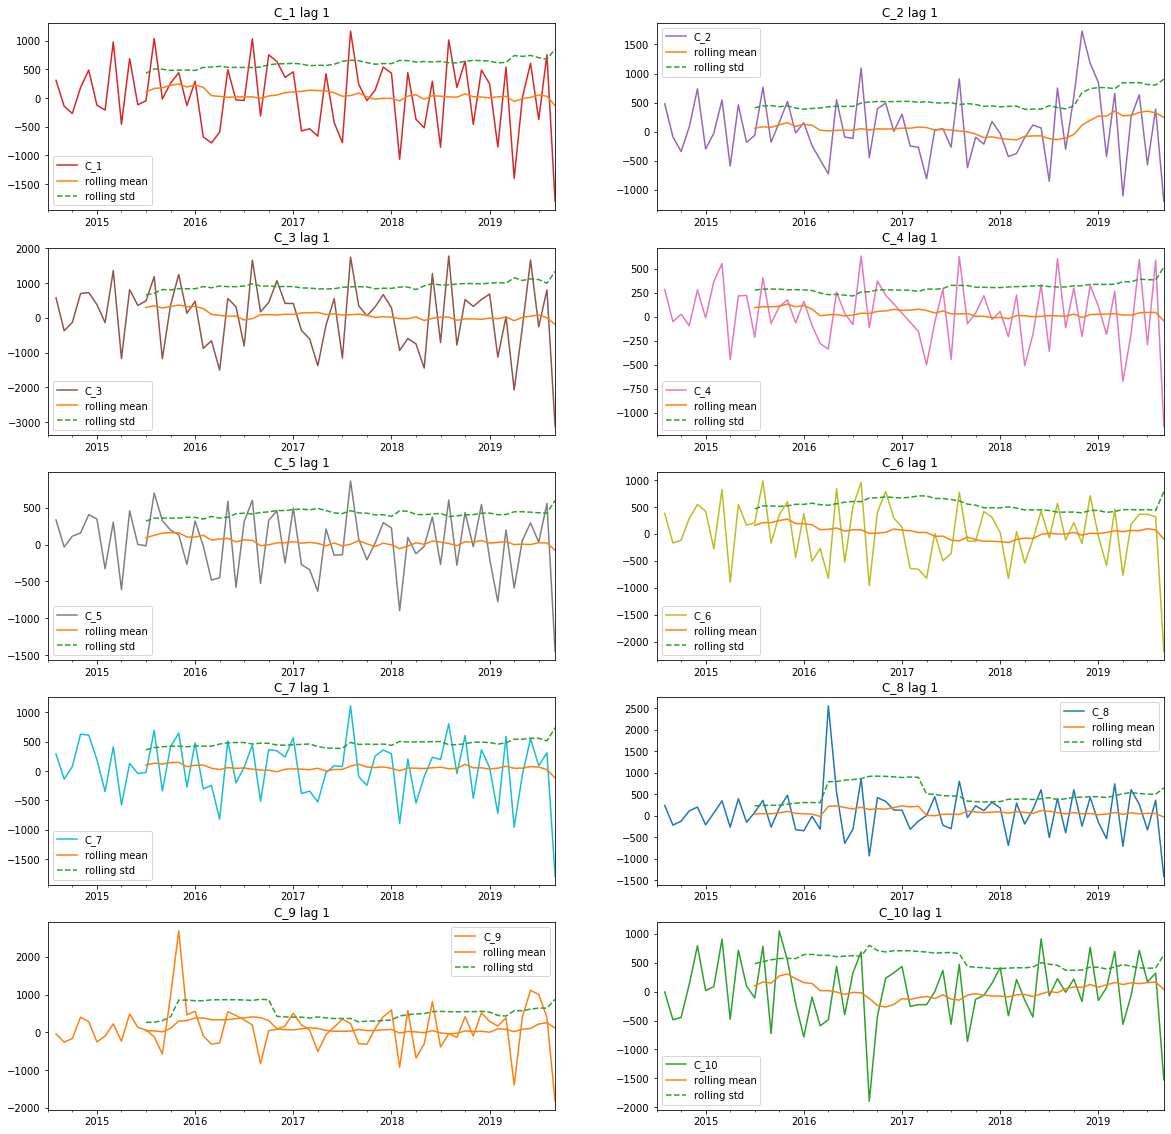

In [11]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
axs = axs.flatten()
for i, item in enumerate(sales.columns):
    sales[item].diff().plot(title=f"{item} lag 1",
                     color=next(color_cycle),
                     ax=axs[i])
    sales[item].diff().rolling(12).mean().plot(
                     color=cols[1],
                     ax=axs[i], label="rolling mean")
    sales[item].diff().rolling(12).std().plot(
                     color=cols[2],
                     ax=axs[i], linestyle='--', label="rolling std")
    axs[i].legend()

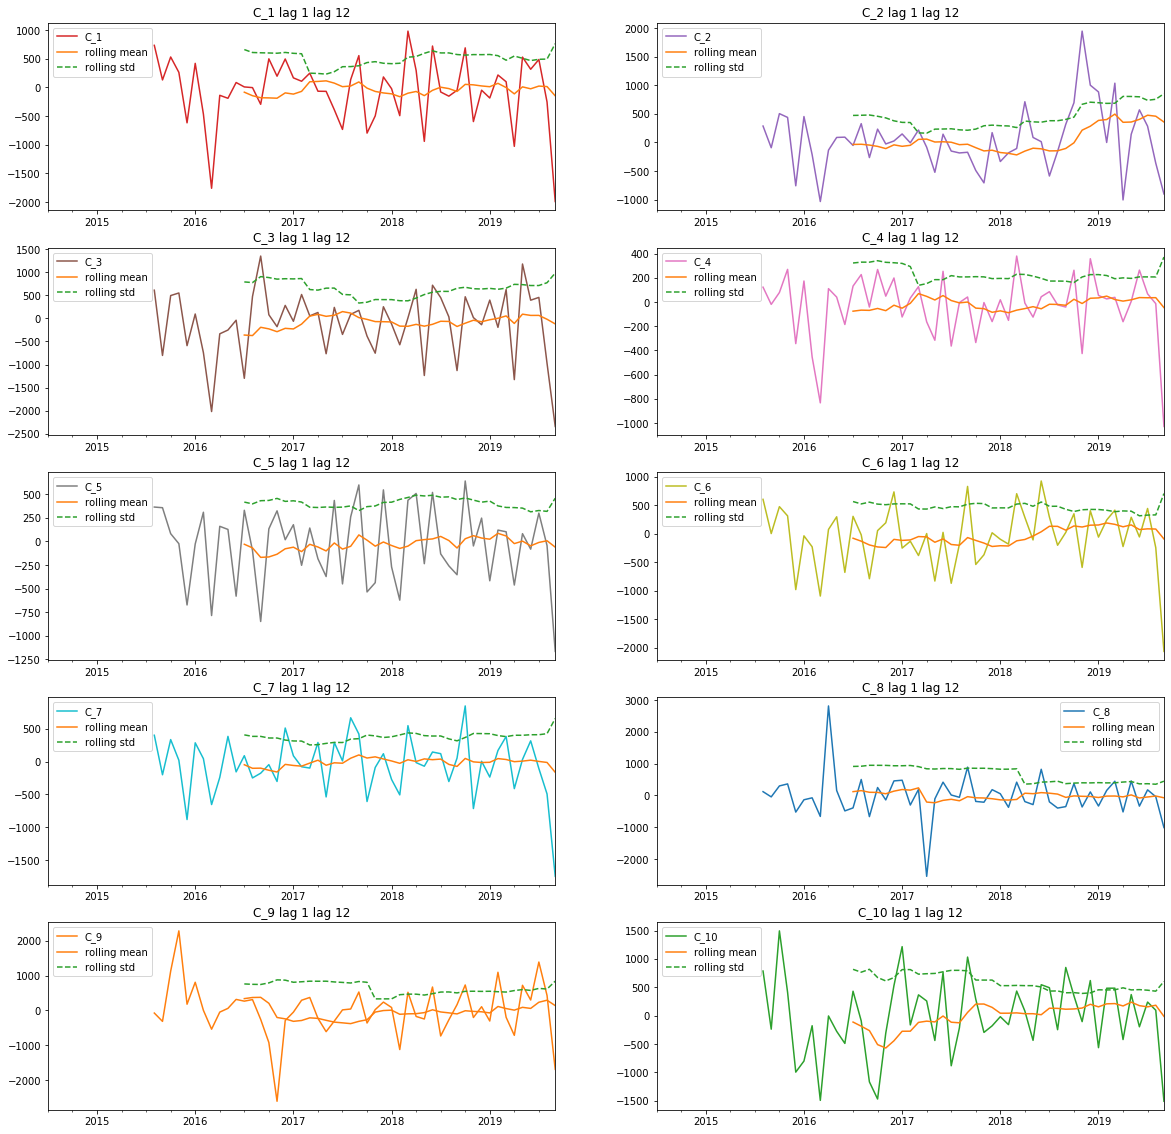

In [12]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
axs = axs.flatten()
for i, item in enumerate(sales.columns):
    sales[item].diff(1).diff(12).plot(title=f"{item} lag 1 lag 12",
                     color=next(color_cycle),
                     ax=axs[i])
    sales[item].diff(1).diff(12).rolling(12).mean().plot(
                     color=cols[1],
                     ax=axs[i], label="rolling mean")
    sales[item].diff(1).diff(12).rolling(12).std().plot(
                     color=cols[2],
                     ax=axs[i], linestyle='--', label="rolling std")
    axs[i].legend()

In [13]:
sales.index.month

Int64Index([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
            12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,
             5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9],
           dtype='int64')

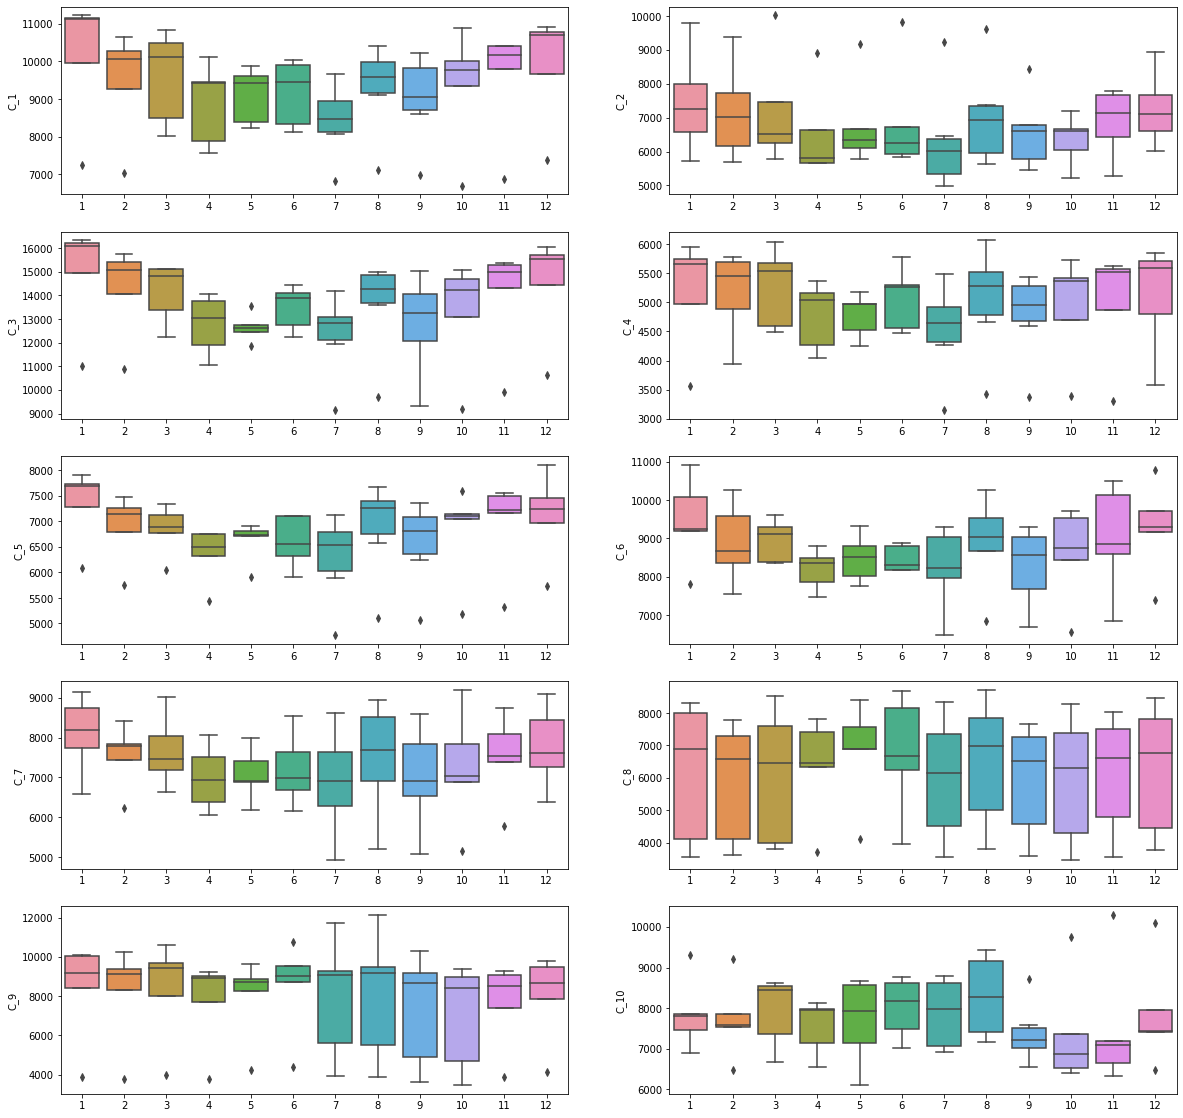

In [14]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
axes = axes.flatten()
for name, ax in zip(sales.columns, axes):
    sns.boxplot(data=sales, x=sales.index.month, y=name, ax=ax)

In [32]:
def plotseasonal(res, axes):
    res.observed.plot(ax=axes[0], legend=False, title=f"C_{plotseasonal.counter}")
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False, marker='o', linestyle='', markersize=5)
    axes[3].set_ylabel('Residual')
    plotseasonal.counter += 1
def grid_plotseasonal(df, ncol):
    nrow=ceil(10/ncol)*4
    fig, axes = plt.subplots(ncols=ncol, nrows=nrow, sharex=True, figsize=(15,1.5*nrow))
    plotseasonal.counter, k = 1, 0
    for i,col in enumerate(df.columns):
        res = seasonal_decompose(df[col].dropna(), period=12, filt=None)
        plotseasonal(res, axes[k:k+4, i%ncol])
        if (i%ncol)==(ncol-1) : k+=4
    plt.tight_layout()
    plt.show()

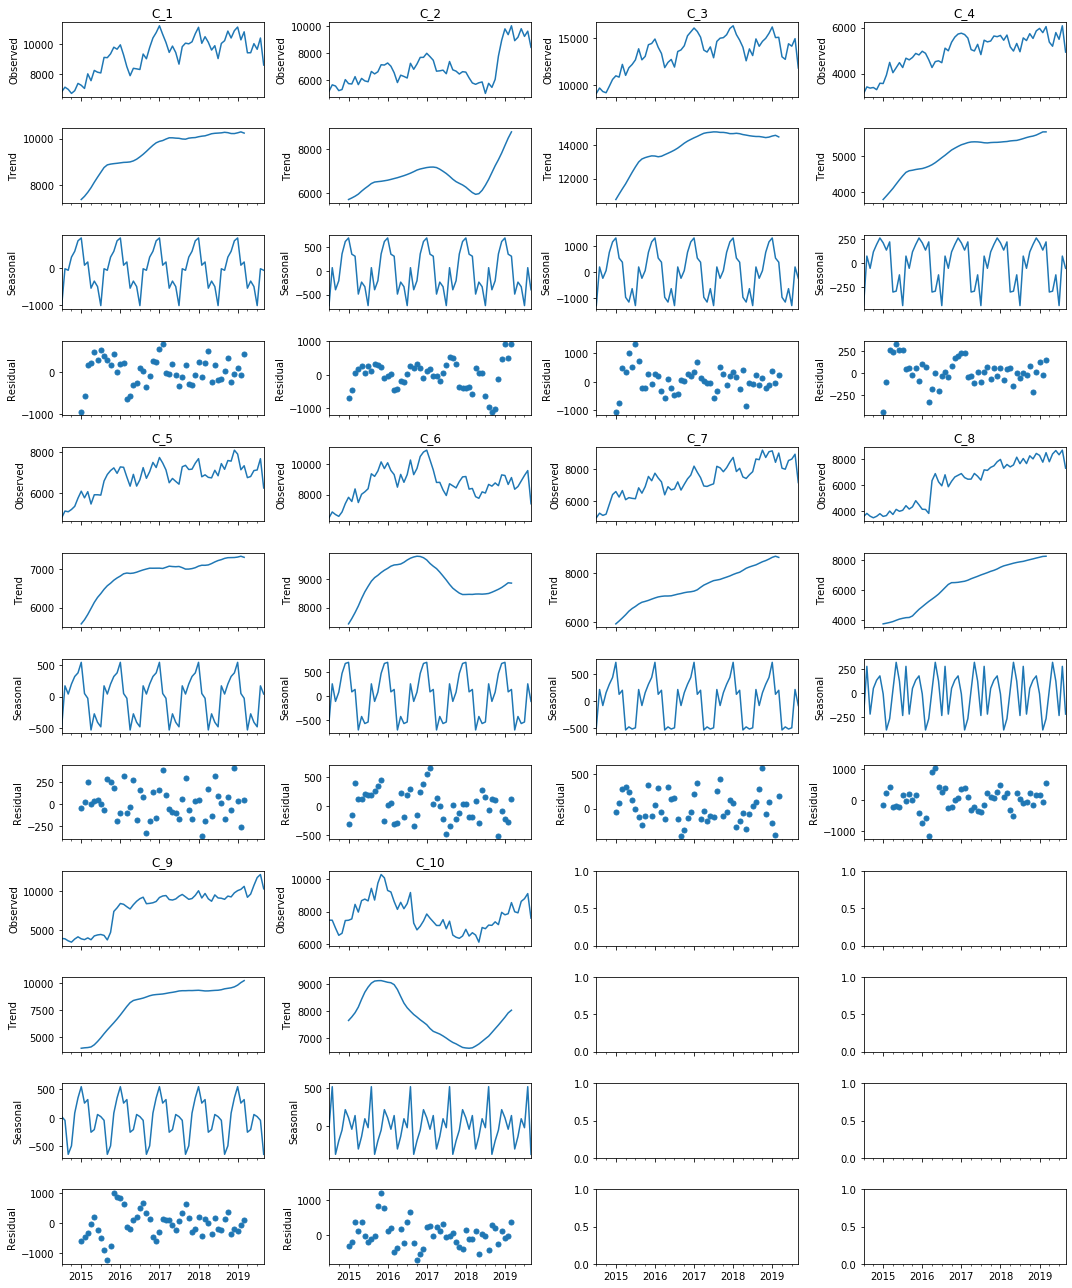

In [34]:
grid_plotseasonal(sales, ncol=4)

In [17]:
d = pd.DataFrame(0, index=sales.columns, columns=["RESMEAN","OBSMEAN","PERC"], dtype=float)
for col in sales.columns:
    result = seasonal_decompose(sales[col], period=12, model='additive')
    res, obs = result.resid, result.observed
    d.loc[col][:2] = list(map(lambda x: np.mean(np.abs(x)), (res, obs[~np.isnan(res)])))
d.PERC = d.RESMEAN*100/d.OBSMEAN
d.round(2)

,RESMEAN,OBSMEAN,PERC
C_1,267.48,9537.53,2.80
C_2,326.79,6756.51,4.84
C_3,327.56,13972.29,2.34
C_4,112.43,5085.02,2.21
C_5,150.68,6922.08,2.18
C_6,224.60,8945.43,2.51
C_7,181.39,7483.16,2.42
C_8,289.22,6292.82,4.60
C_9,349.65,8069.27,4.33
C_10,279.43,7773.47,3.59


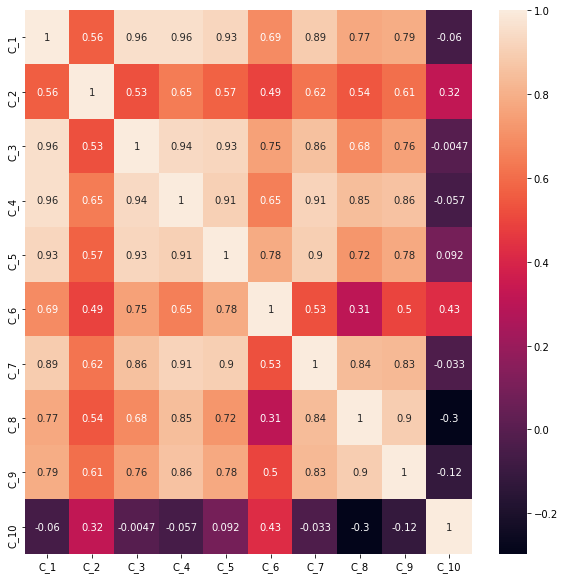

In [35]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(sales.corr(), annot=True)

In [99]:
adj_mat = sales.corr()>0.7
adj_mat

,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10
C_1,True,False,True,True,True,False,True,True,True,False
C_2,False,True,False,False,False,False,False,False,False,False
C_3,True,False,True,True,True,True,True,False,True,False
C_4,True,False,True,True,True,False,True,True,True,False
C_5,True,False,True,True,True,True,True,True,True,False
C_6,False,False,True,False,True,True,False,False,False,False
C_7,True,False,True,True,True,False,True,True,True,False
C_8,True,False,False,True,True,False,True,True,True,False
C_9,True,False,True,True,True,False,True,True,True,False
C_10,False,False,False,False,False,False,False,False,False,True


In [44]:
import matplotlib.pyplot as plt
import networkx as nx

def show_graph_with_labels(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, labels=mylabels, with_labels=True)
    plt.show()

show_graph_with_labels(adj_mat, make_label_dict(get_labels('mycsv.csv')))

NameError: name 'make_label_dict' is not defined

In [103]:
G=nx.from_pandas_adjacency(adj_mat, create_using=nx.DiGraph())

In [102]:
G = nx.from_numpy_matrix(adj_mat.values, parallel_edges=True, 
                         create_using=nx.MultiDiGraph())

# Because we use numpy, labels need to be reset
label_mapping = {idx: val for idx, val in enumerate(adj_mat.columns)}
G = nx.relabel_nodes(G, label_mapping)

G.edges(data=True)


OutMultiEdgeDataView([('C_1', 'C_1', {'weight': True}), ('C_1', 'C_3', {'weight': True}), ('C_1', 'C_4', {'weight': True}), ('C_1', 'C_5', {'weight': True}), ('C_1', 'C_7', {'weight': True}), ('C_1', 'C_8', {'weight': True}), ('C_1', 'C_9', {'weight': True}), ('C_2', 'C_2', {'weight': True}), ('C_3', 'C_1', {'weight': True}), ('C_3', 'C_3', {'weight': True}), ('C_3', 'C_4', {'weight': True}), ('C_3', 'C_5', {'weight': True}), ('C_3', 'C_6', {'weight': True}), ('C_3', 'C_7', {'weight': True}), ('C_3', 'C_9', {'weight': True}), ('C_4', 'C_1', {'weight': True}), ('C_4', 'C_3', {'weight': True}), ('C_4', 'C_4', {'weight': True}), ('C_4', 'C_5', {'weight': True}), ('C_4', 'C_7', {'weight': True}), ('C_4', 'C_8', {'weight': True}), ('C_4', 'C_9', {'weight': True}), ('C_5', 'C_1', {'weight': True}), ('C_5', 'C_3', {'weight': True}), ('C_5', 'C_4', {'weight': True}), ('C_5', 'C_5', {'weight': True}), ('C_5', 'C_6', {'weight': True}), ('C_5', 'C_7', {'weight': True}), ('C_5', 'C_8', {'weight': 

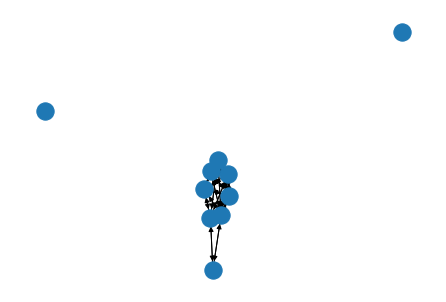

In [104]:
nx.draw(G)

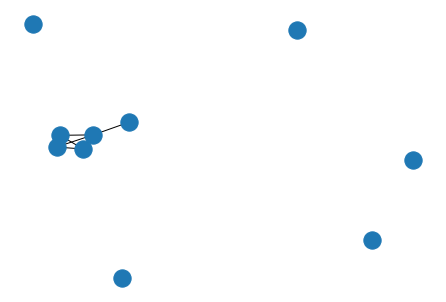

In [81]:
# nx.draw(adj_mat)
G = nx.from_pandas_adjacency(adj_mat)
nx.draw(G)

In [78]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 10
Number of edges: 17
Average degree:   3.4000


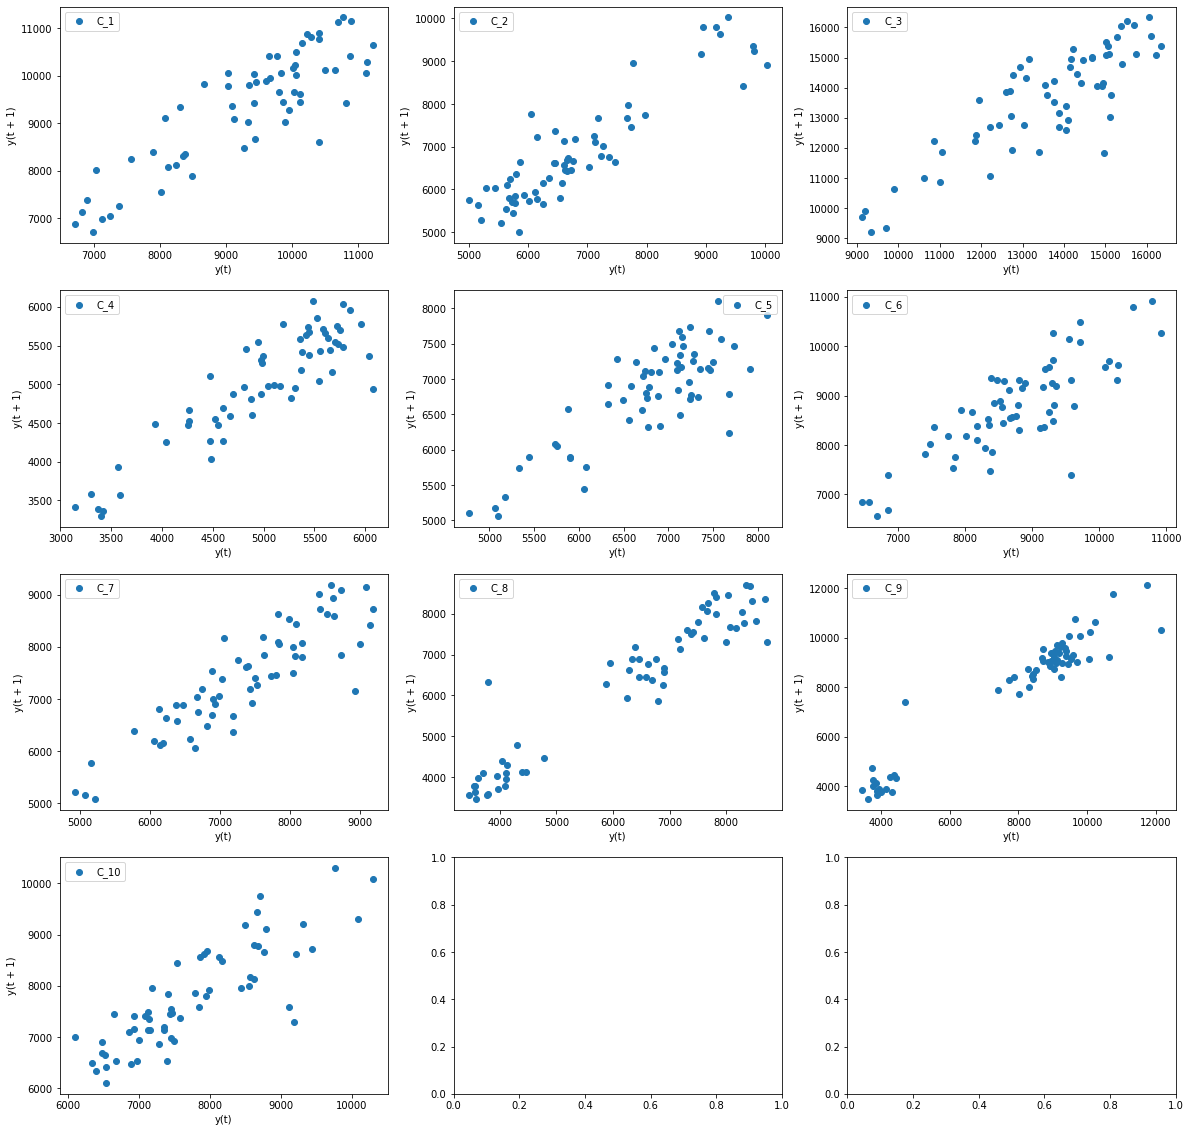

In [19]:
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes = axes.flatten()
for name, ax in zip(sales.columns, axes):
    lag_plot(sales[name], ax=ax, label=name)
    ax.legend()

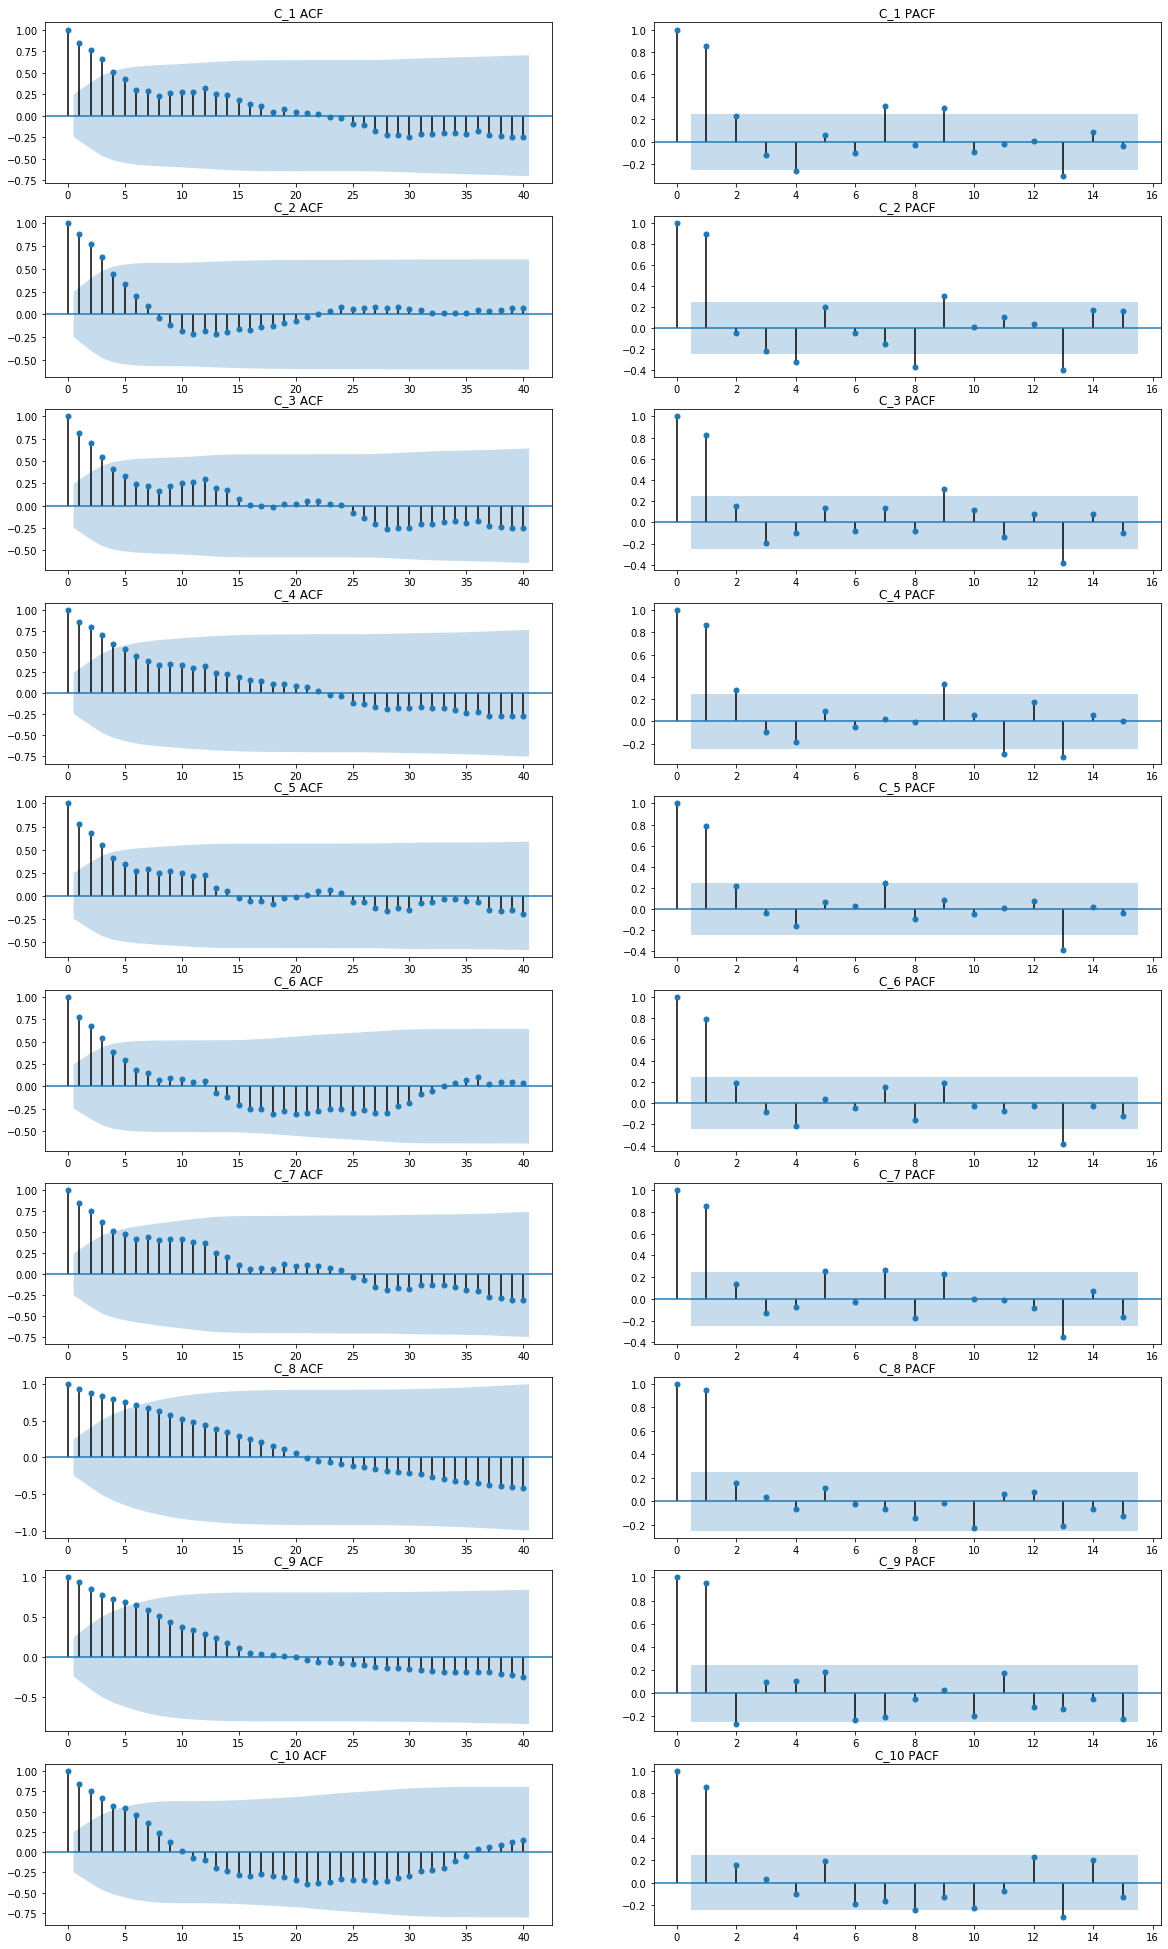

In [20]:
fig, axes = plt.subplots(10, 2, figsize=(20, 35), sharex=False)
alpha=.05
for i, col in enumerate(sales.columns):
    sm.graphics.tsa.plot_acf(sales[col].values.squeeze(), lags=40, ax=axes[i,0], title=f"{col} ACF", alpha=alpha)
    sm.graphics.tsa.plot_pacf(sales[col].values.squeeze(), lags=15, ax=axes[i,1], title=f"{col} PACF", alpha=alpha)

### Frome these resources : 

https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

https://learn.co/lessons/dsc-3-25-09-time-series-decomposition

In [21]:
# Import the check_stationarity function from previous lab
def stationarity_check(TS):
    # Calculate rolling statistics
    rolmean = TS.rolling(window = 8, center = False).mean()
    rolstd = TS.rolling(window = 8, center = False).std()
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS) # change the passengers column as required 
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    return None

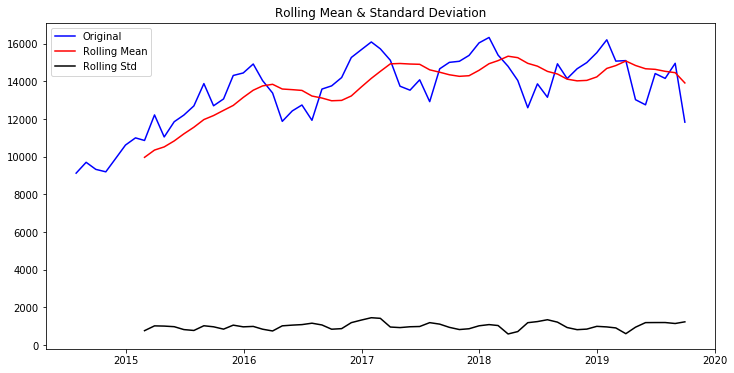

Results of Dickey-Fuller Test:
Test Statistic                 -4.376857
p-value                         0.000326
#Lags Used                     11.000000
Number of Observations Used    51.000000
Critical Value (1%)            -3.565624
Critical Value (5%)            -2.920142
Critical Value (10%)           -2.598015
dtype: float64


In [22]:
stationarity_check(sales.C_3)